# Converting photometry table from interactive photometry tool to a light curve

-Example WASP-36 b


Code Improvement notes
- needs ability to remove miss-clicked stars
- a guess for identical psf locations on next frame with ability to edit if they look incorrect
- ^reuse previous aperatures option? 
- update on psf photometry click not next click (prob with last frame)
- start next frame at same zoom level
- Save table to csv
- print statement on interface?
- quality flag button

New Code improvement notes
- still needs save dataframe to csv command
- Dropped observation time column? Not cool 
- still needs an undo star selection option 




In [13]:
from io import StringIO
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.time import Time

Point to reduced data path, or wherever frame_info and photometry results were saved

In [12]:
!pwd

/Users/bencapistrant/Documents/GitHub/rho_data_reduction_pipeline/photometry_mplw


In [3]:
path = '/Users/bencapistrant/Documents/GitHub/rho_data_reduction_pipeline/data/WASP36b/Reduced/'

In [15]:
raw = pd.read_csv(path+'WASP-36B_psf_photometry_results.csv')
raw

,File,Star_1_x,Star_1_y,Star_1_flux,Star_1_noise,Star_2_x,Star_2_y,Star_2_flux,Star_2_noise,Star_3_x,...,Star_3_flux,Star_3_noise,Star_4_x,Star_4_y,Star_4_flux,Star_4_noise,Star_5_x,Star_5_y,Star_5_flux,Star_5_noise
0,WASP36B.2025-02-17.0132_reduced.fits,543,406,1654.322685,381.819041,446,362,270.749240,347.396563,541,...,3034.497748,395.333024,621,527,84.173488,302.169845,683,441,299.127432,360.326233
1,WASP36B.2025-02-17.0167_reduced.fits,543,406,1710.086717,381.892059,446,362,289.202626,350.038961,541,...,3190.911490,393.217706,621,527,88.674295,292.980834,683,441,323.239988,360.359691
2,WASP36B.2025-02-17.0135_reduced.fits,543,406,1828.079657,393.804243,446,362,311.021538,362.865454,541,...,3267.270053,390.988586,621,527,90.407402,296.080988,683,441,334.321580,365.402636
3,WASP36B.2025-02-17.0160_reduced.fits,543,406,1556.779450,364.577969,446,362,252.358760,311.364974,541,...,2859.401571,361.345845,621,527,74.402117,259.959629,683,441,281.491918,328.517843
4,WASP36B.2025-02-17.0175_reduced.fits,543,406,1614.828472,374.530292,446,362,261.928804,325.699188,541,...,2996.326983,385.943303,621,527,74.056927,263.444705,683,441,289.321283,339.454854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,WASP36B.2025-02-17.0188_reduced.fits,543,406,1526.977443,376.841528,446,362,259.951328,360.271867,541,...,2813.256564,388.063928,621,527,60.467735,252.816488,683,441,269.429023,344.758761
60,WASP36B.2025-02-17.0141_reduced.fits,543,406,558.089083,214.870449,446,362,87.485928,195.961505,541,...,1101.681784,228.443098,621,527,6.407944,85.464632,683,441,101.009790,209.494109
61,WASP36B.2025-02-17.0146_reduced.fits,543,406,1662.372145,379.432973,446,362,281.077574,342.119574,541,...,3099.771673,383.707218,621,527,74.427007,266.885615,683,441,300.207748,344.803396
62,WASP36B.2025-02-17.0153_reduced.fits,543,406,1681.497146,386.602965,446,362,288.367266,355.211679,541,...,3122.038325,386.106132,621,527,84.596052,289.843479,683,441,312.851795,357.804793


In [16]:
obs_info = pd.read_csv(path+'frame_info.csv')
obs_info

,Directory,File,Object,Date-Obs,Filter,Exptime,Dark Current,Read Noise,Flat Noise
0,/Users/bencapistrant/Documents/GitHub/rho_data...,WASP36B.2025-02-17.0132_reduced.fits,WASP-36B,2025-02-18T01:44:30.345,R,150.0,9.886016,42.597653,0.053058
1,/Users/bencapistrant/Documents/GitHub/rho_data...,WASP36B.2025-02-17.0167_reduced.fits,WASP-36B,2025-02-18T03:15:50.730,R,150.0,9.886016,42.597653,0.053058
2,/Users/bencapistrant/Documents/GitHub/rho_data...,WASP36B.2025-02-17.0135_reduced.fits,WASP-36B,2025-02-18T01:52:14.432,R,150.0,9.886016,42.597653,0.053058
3,/Users/bencapistrant/Documents/GitHub/rho_data...,WASP36B.2025-02-17.0160_reduced.fits,WASP-36B,2025-02-18T02:57:57.963,R,150.0,9.886016,42.597653,0.053058
4,/Users/bencapistrant/Documents/GitHub/rho_data...,WASP36B.2025-02-17.0175_reduced.fits,WASP-36B,2025-02-18T03:36:17.242,R,150.0,9.886016,42.597653,0.053058
...,...,...,...,...,...,...,...,...,...
59,/Users/bencapistrant/Documents/GitHub/rho_data...,WASP36B.2025-02-17.0188_reduced.fits,WASP-36B,2025-02-18T04:09:30.453,R,150.0,9.886016,42.597653,0.053058
60,/Users/bencapistrant/Documents/GitHub/rho_data...,WASP36B.2025-02-17.0141_reduced.fits,WASP-36B,2025-02-18T02:07:33.394,R,150.0,9.886016,42.597653,0.053058
61,/Users/bencapistrant/Documents/GitHub/rho_data...,WASP36B.2025-02-17.0146_reduced.fits,WASP-36B,2025-02-18T02:21:08.186,R,150.0,9.886016,42.597653,0.053058
62,/Users/bencapistrant/Documents/GitHub/rho_data...,WASP36B.2025-02-17.0153_reduced.fits,WASP-36B,2025-02-18T02:39:07.041,R,150.0,9.886016,42.597653,0.053058


In [97]:
# obs_info.sort_values(by='Date-Obs')

In [17]:
combined = pd.merge(raw, obs_info, left_on='File', right_on='File', how='left').sort_values(by='Date-Obs').reset_index(drop=True)
combined

,File,Star_1_x,Star_1_y,Star_1_flux,Star_1_noise,Star_2_x,Star_2_y,Star_2_flux,Star_2_noise,Star_3_x,...,Star_5_flux,Star_5_noise,Directory,Object,Date-Obs,Filter,Exptime,Dark Current,Read Noise,Flat Noise
0,WASP36B.2025-02-17.0130_reduced.fits,543,406,1794.158864,393.761172,446,362,294.305387,342.138905,541,...,324.888392,352.685992,/Users/bencapistrant/Documents/GitHub/rho_data...,WASP-36B,2025-02-18T01:39:22.989,R,150.0,9.886016,42.597653,0.053058
1,WASP36B.2025-02-17.0131_reduced.fits,543,406,1637.771587,374.560920,446,362,264.867874,325.703700,541,...,292.769647,342.136661,/Users/bencapistrant/Documents/GitHub/rho_data...,WASP-36B,2025-02-18T01:41:56.670,R,150.0,9.886016,42.597653,0.053058
2,WASP36B.2025-02-17.0132_reduced.fits,543,406,1654.322685,381.819041,446,362,270.749240,347.396563,541,...,299.127432,360.326233,/Users/bencapistrant/Documents/GitHub/rho_data...,WASP-36B,2025-02-18T01:44:30.345,R,150.0,9.886016,42.597653,0.053058
3,WASP36B.2025-02-17.0133_reduced.fits,543,406,1726.398848,398.282561,446,362,286.546697,360.308775,541,...,315.767563,372.792005,/Users/bencapistrant/Documents/GitHub/rho_data...,WASP-36B,2025-02-18T01:47:05.012,R,150.0,9.886016,42.597653,0.053058
4,WASP36B.2025-02-17.0134_reduced.fits,543,406,1749.532113,386.690946,446,362,294.076214,347.430135,541,...,313.840751,357.806175,/Users/bencapistrant/Documents/GitHub/rho_data...,WASP-36B,2025-02-18T01:49:38.284,R,150.0,9.886016,42.597653,0.053058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,WASP36B.2025-02-17.0192_reduced.fits,543,406,1526.286417,374.412069,446,362,242.096491,331.223529,541,...,270.554901,336.728945,/Users/bencapistrant/Documents/GitHub/rho_data...,WASP-36B,2025-02-18T04:19:44.489,R,150.0,9.886016,42.597653,0.053058
60,WASP36B.2025-02-17.0193_reduced.fits,543,406,1567.283728,372.022776,446,362,255.848584,331.244288,541,...,289.784954,355.213674,/Users/bencapistrant/Documents/GitHub/rho_data...,WASP-36B,2025-02-18T04:22:16.948,R,150.0,9.886016,42.597653,0.053058
61,WASP36B.2025-02-17.0194_reduced.fits,543,406,1551.874756,379.287336,446,362,258.909177,347.379522,541,...,275.989068,344.768274,/Users/bencapistrant/Documents/GitHub/rho_data...,WASP-36B,2025-02-18T04:24:50.026,R,150.0,9.886016,42.597653,0.053058
62,WASP36B.2025-02-17.0195_reduced.fits,543,406,1443.275511,359.380987,446,362,234.062667,325.656406,541,...,247.991653,320.026759,/Users/bencapistrant/Documents/GitHub/rho_data...,WASP-36B,2025-02-18T04:27:22.819,R,150.0,9.886016,42.597653,0.053058


In [18]:
from itertools import product
import pickle

import ipywidgets as ipw
import numpy as np

from matplotlib import pyplot as plt
from astropy.table import Table

from stellarphot.analysis.transit_fitting import TransitModelFit
from stellarphot.visualization.transit_plots import *
from stellarphot.visualization.fits_opener import FitsOpener

from astropy.timeseries import BinnedTimeSeries, TimeSeries, aggregate_downsample
from astropy.time import Time
from astropy.table import Table 
from astropy import units as u

In [10]:
fo = FitsOpener(title="Select your photometry/flux file", filter_pattern=["*.csv", "*.fits"])

In [2]:
# !pip install packaging==21.3

In [19]:
t =[]
for i in range(len(combined)):
    t.append(Time(combined.at[i, 'Date-Obs'], format='isot', scale='utc').jd)

sorted_indices = np.argsort(t)


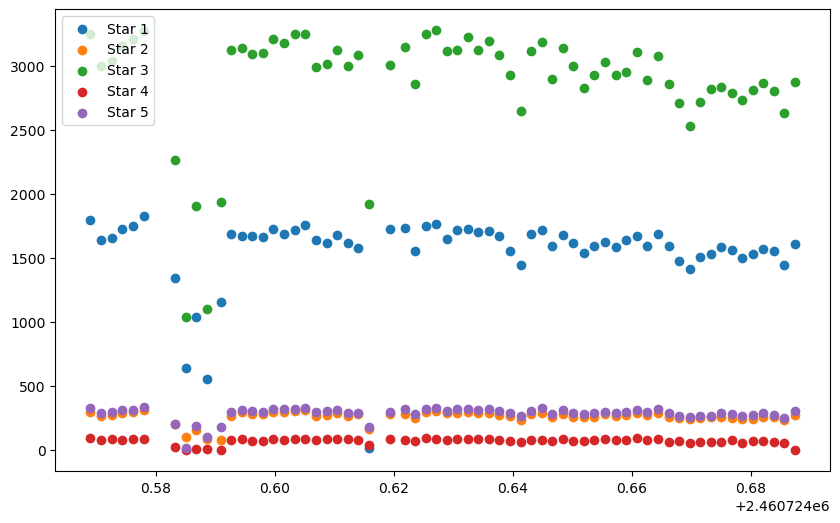

In [24]:
plt.figure(figsize=(10, 6))
# for i in [0,1,2,3,4,5,6,7,]:
for i in [0,1,2,3,4,]:
    plt.scatter(t,combined[f'Star_{i+1}_flux'],label=f'Star {i+1}')
    # print(i)
# plt.scatter(t, wasp36['sum_flux'],label='WASP-36b',)
# [plt.scatter(t, refs[i]['sum_flux'], marker='x',label=f'ref {i+1}') for i in range(len(refs))]
    plt.legend()    

In [26]:
# refs = [6,7,8]
refs = [2,3,4,5]
# refs = [4,5,6,7,8]
ref_flux = np.array([combined[f'Star_{i}_flux'].values for i in refs])
ref_corr = ref_flux.sum(axis=0)/len(refs)

In [27]:
ref_flux

array([[2.94305387e+02, 2.64867874e+02, 2.70749240e+02, 2.86546697e+02,
        2.94076214e+02, 3.11021538e+02, 2.07449928e+02, 1.02098146e+02,
        1.53815258e+02, 8.74859281e+01, 8.20309033e+01, 2.66977235e+02,
        2.93948214e+02, 2.80334352e+02, 2.81077574e+02, 2.96599743e+02,
        2.94586738e+02, 3.02499813e+02, 3.09309609e+02, 2.68442095e+02,
        2.75896600e+02, 2.88367266e+02, 2.67745979e+02, 2.80065769e+02,
        1.61939602e+02, 2.78046975e+02, 2.84538112e+02, 2.52358760e+02,
        2.97835125e+02, 3.05955825e+02, 2.87506340e+02, 2.88344086e+02,
        2.93646938e+02, 2.91664316e+02, 2.89202626e+02, 2.72460762e+02,
        2.65166839e+02, 2.37558724e+02, 2.79707501e+02, 2.92170727e+02,
        2.56458775e+02, 2.78252008e+02, 2.61928804e+02, 2.54717324e+02,
        2.62142955e+02, 2.80195186e+02, 2.66836304e+02, 2.71090286e+02,
        2.90131967e+02, 2.71870775e+02, 2.86812158e+02, 2.58571487e+02,
        2.48130259e+02, 2.44793990e+02, 2.50389975e+02, 2.599513

In [28]:
ref_corr

array([ 988.93968009,  907.89943702,  922.13697687,  958.4726747 ,
        974.58433805, 1000.75514325,  674.24919903,  288.95460729,
        564.29075159,  324.1463613 ,  549.46167833,  943.11731611,
        957.56270987,  937.11866367,  938.87100025,  977.55760452,
        965.47715915,  989.66043085,  990.96819717,  908.42662594,
        919.48035106,  951.96335956,  910.18061702,  930.76225921,
        574.85098791,  916.36272186,  956.307888  ,  866.91359164,
        990.55355801, 1000.54588839,  947.39456986,  953.73731863,
        981.49227558,  954.42007954,  973.00709969,  934.59633396,
        886.93028976,  803.24202597,  944.41502123,  970.53224069,
        877.59567049,  953.62950746,  905.40849922,  857.54322117,
        889.63345003,  923.7065268 ,  890.51411962,  900.74418544,
        950.70604238,  884.48634148,  941.26137575,  867.00557304,
        825.72510834,  771.20036195,  822.32687587,  850.77616227,
        861.6647554 ,  847.4951912 ,  824.45711769,  847.70888

In [29]:
wasp36_flux = combined['Star_1_flux'] / ref_corr

In [30]:
# Sort wasp36_flux and t by time order
sorted_indices = np.argsort(t)
wasp36_flux_sorted = wasp36_flux.values[sorted_indices]
t_sorted = np.array(t)[sorted_indices]

In [34]:
flux_err = combined['Star_1_noise']

In [36]:
flux_err

0     393.761172
1     374.560920
2     381.819041
3     398.282561
4     386.690946
         ...    
59    374.412069
60    372.022776
61    379.287336
62    359.380987
63    379.355902
Name: Star_1_noise, Length: 64, dtype: float64

<ErrorbarContainer object of 3 artists>

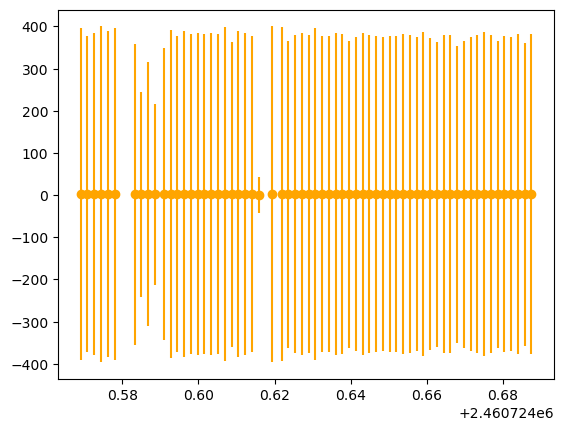

In [38]:
# plt.scatter(t,wasp36_flux, label='WASP-36b flux correction', color='orange')
plt.errorbar(t_sorted, wasp36_flux_sorted, 
             yerr=flux_err.values[sorted_indices], 
             fmt='o', color='orange', label='WASP-36b error')
# plt.ylim(0.9,1.2) 
# plt.ylim(0.75,2)

(0.9, 1.2)

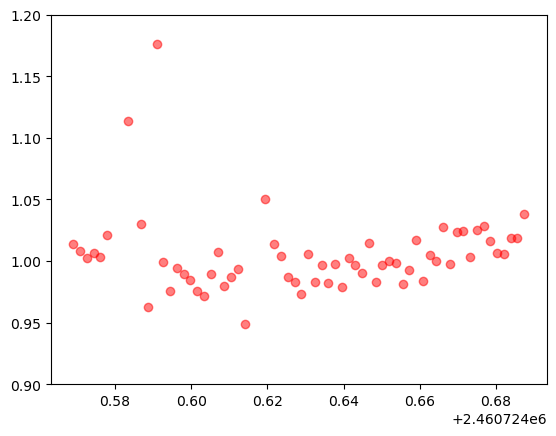

In [32]:
plt.scatter(t_sorted, wasp36_flux_sorted/np.median(wasp36_flux_sorted), label='WASP-36b flux correction (sorted)', color='red', alpha=0.5)
plt.ylim(0.9,1.2) 